# Sector 1

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
data = get_output('../output_log/s1.txt')
print(len(data))
metadata = pd.read_csv('/storage/astro2/phrdhx/tesslcs/sector1lookup.csv')
print(len(metadata[metadata.Magnitude < 13]))

286174
286174


In [3]:
data = data[data.transit_prob == 'maybeTransit']
print(len(data), f"after maybeTransit, {round(len(data)/len(metadata[metadata.Magnitude < 13]),3)*100}% candidates remain")
data.head()

104211 after maybeTransit, 36.4% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
10,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,294092361,-5.09826,-2.08504,1328.38490,1.24939,0.01190,0.75048,30.00000,48.64674,...,104,43452.31082,34728.77832,639.00457,510.71733,0.00861,0.00770,0.00689,0.00591,maybeTransit
16,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,2055286001,-8.21688,-3.50055,1336.80668,1.23931,0.00059,0.28407,5.16014,2.53951,...,509,393.91559,242.77910,8.95263,5.51771,0.00043,0.00038,0.00036,0.00028,maybeTransit
19,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,260164550,-4.88863,-3.16598,1329.61429,0.98266,0.00105,0.51335,0.93502,6.32145,...,163,98.26582,97.66552,1.32792,1.31980,0.00101,0.00102,0.00076,0.00080,maybeTransit
22,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,50309073,-3.88496,-2.70207,1350.32545,1.05582,0.00043,0.50946,-6.62113,6.32614,...,1158,135.77159,120.86389,1.57874,1.40539,0.00039,0.00037,0.00031,0.00031,maybeTransit
24,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,294207587,-9.04349,-4.10052,1328.71823,1.06799,0.00022,0.10979,4.67757,3.47355,...,120,165.43181,152.88796,2.66826,2.46593,0.00036,0.00035,0.00029,0.00028,maybeTransit


## Removing worst anomalies

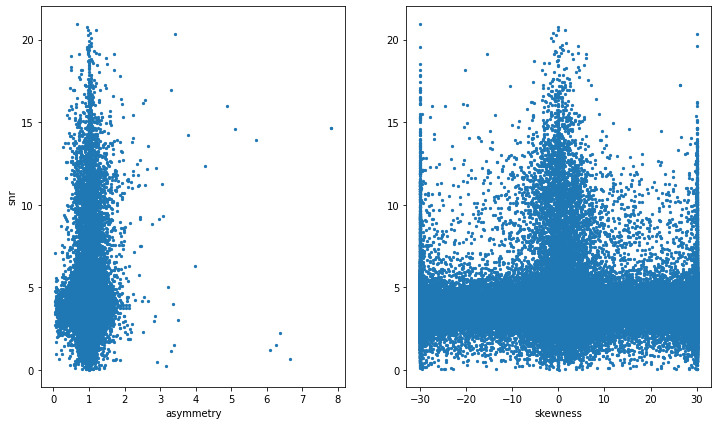

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [5]:
# for i in data.loc[abs(data.skewness >= 10) & abs(data.skewness <= 20)].path.head(): #4 x 4 grid for illustration purposes
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)
data.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,294092361,-5.09826,-2.08504,1328.38490,1.24939,0.01190,0.75048,30.00000,48.64674,...,104,43452.31082,34728.77832,639.00457,510.71733,0.00861,0.00770,0.00689,0.00591,maybeTransit
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,2055286001,-8.21688,-3.50055,1336.80668,1.23931,0.00059,0.28407,5.16014,2.53951,...,509,393.91559,242.77910,8.95263,5.51771,0.00043,0.00038,0.00036,0.00028,maybeTransit
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,260164550,-4.88863,-3.16598,1329.61429,0.98266,0.00105,0.51335,0.93502,6.32145,...,163,98.26582,97.66552,1.32792,1.31980,0.00101,0.00102,0.00076,0.00080,maybeTransit
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,50309073,-3.88496,-2.70207,1350.32545,1.05582,0.00043,0.50946,-6.62113,6.32614,...,1158,135.77159,120.86389,1.57874,1.40539,0.00039,0.00037,0.00031,0.00031,maybeTransit
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,294207587,-9.04349,-4.10052,1328.71823,1.06799,0.00022,0.10979,4.67757,3.47355,...,120,165.43181,152.88796,2.66826,2.46593,0.00036,0.00035,0.00029,0.00028,maybeTransit


### Distribution of Asymmetry vs SNR, and Skewness vs SNR

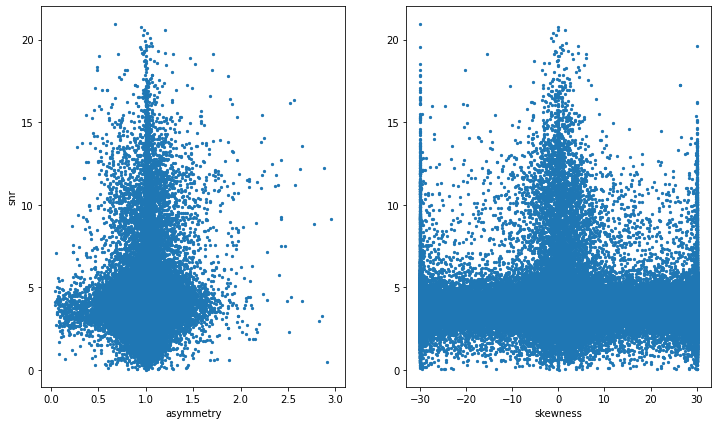

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

#### Histogram of time and duration

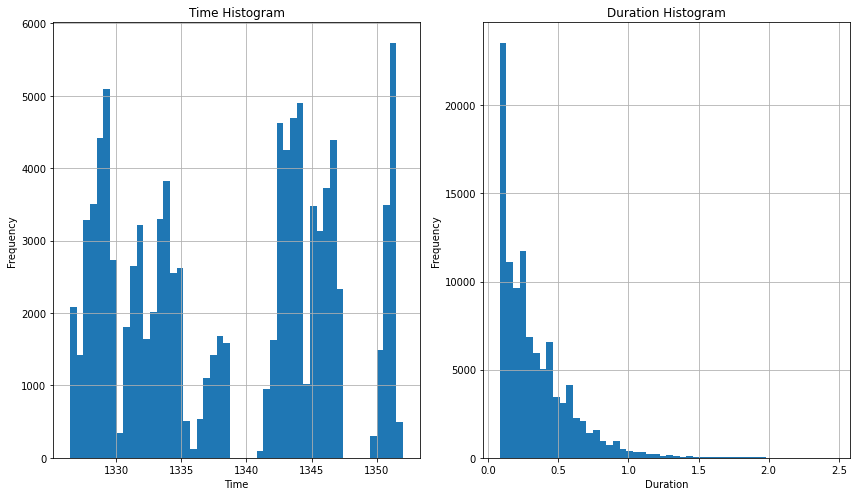

In [8]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

#### 2D Histogram of time and duration

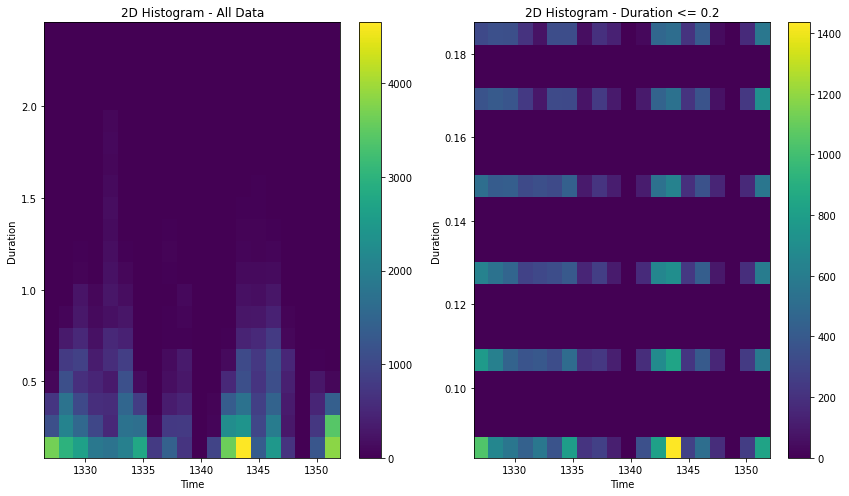

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first hist2d on the first subplot
h1 = ax1.hist2d(data['time'], data['duration'], bins=[20, 20])
ax1.set_title('2D Histogram - All Data')
ax1.set_xlabel('Time')
ax1.set_ylabel('Duration')
plt.colorbar(h1[3], ax=ax1)

# Plot the second hist2d on the second subplot
filtered_data = data[data.duration <= 0.2]
h2 = ax2.hist2d(filtered_data['time'], filtered_data['duration'], bins=[20, 20])
ax2.set_title('2D Histogram - Duration <= 0.2')
ax2.set_xlabel('Time')
ax2.set_ylabel('Duration')
plt.colorbar(h2[3], ax=ax2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Alternative visualisation (Spike just before 1345?)

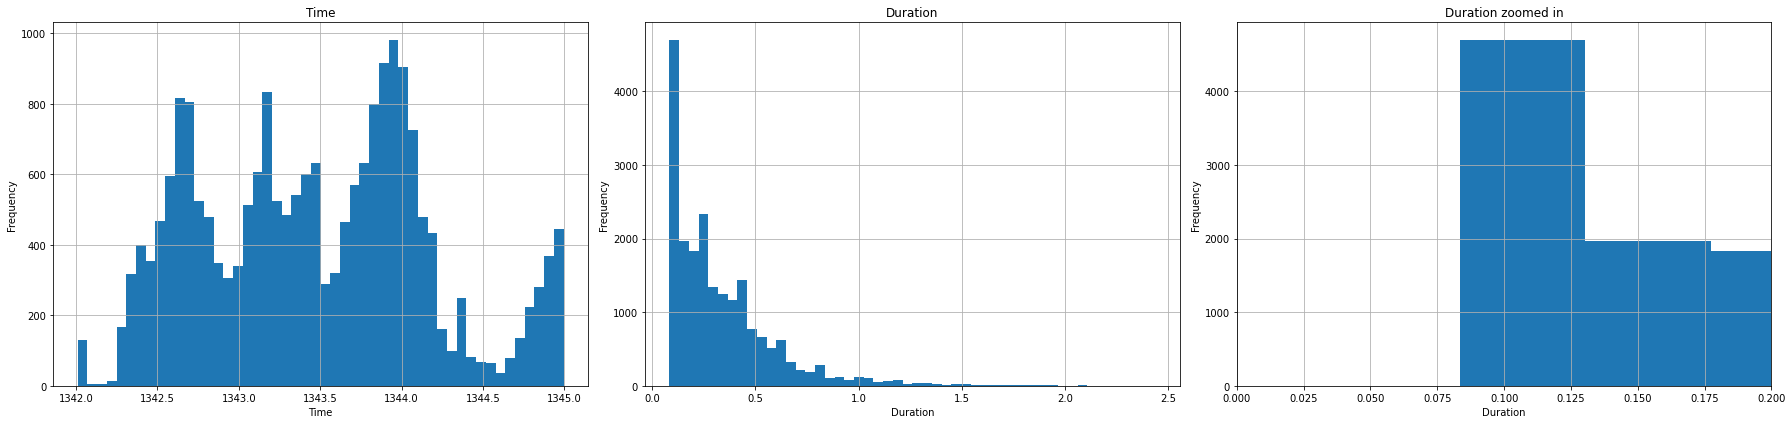

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,6))

# Plot the first histogram on the first subplot
data.loc[(data.time >= 1342) & (data.time <= 1345)].hist('time', bins=50, ax=ax1)
ax1.set_title('Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

# Plot the second histogram on the second subplot
data.loc[(data.time >= 1342) & (data.time <= 1345)].hist('duration', bins=50, ax=ax2)
ax2.set_title('Duration')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Frequency')

data.loc[(data.time >=1342) & (data.time <= 1345)].hist('duration',bins=50,ax=ax3)
ax3.set_title('Duration zoomed in')
ax3.set_xlabel('Duration')
ax3.set_ylabel('Frequency')
ax3.set_xlim([0,0.2])

plt.tight_layout()
plt.show()

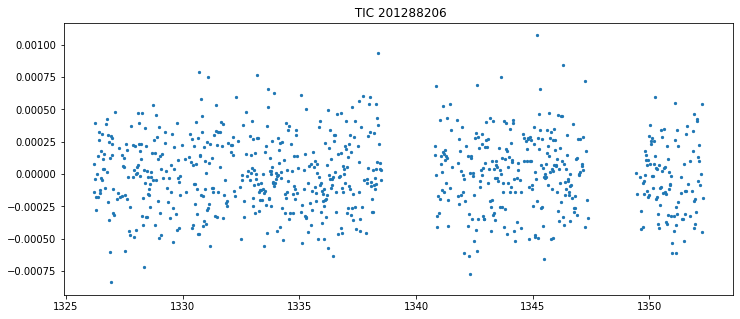

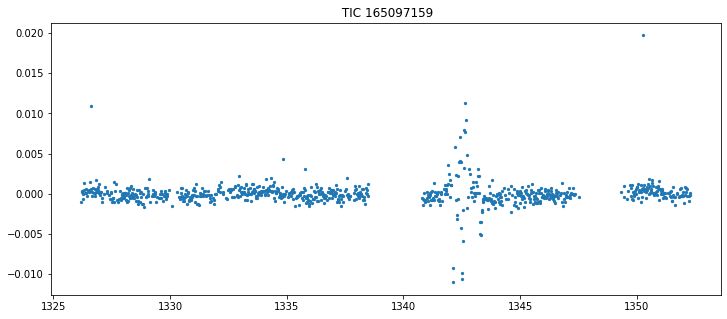

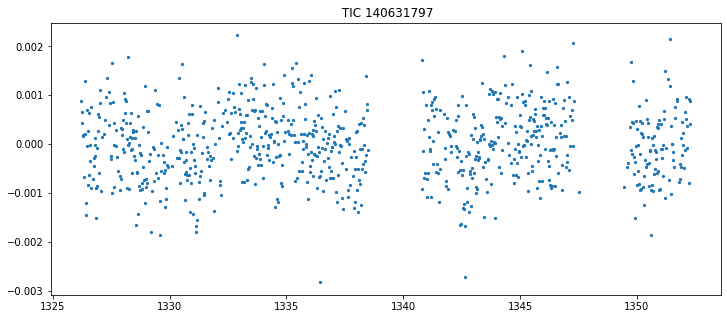

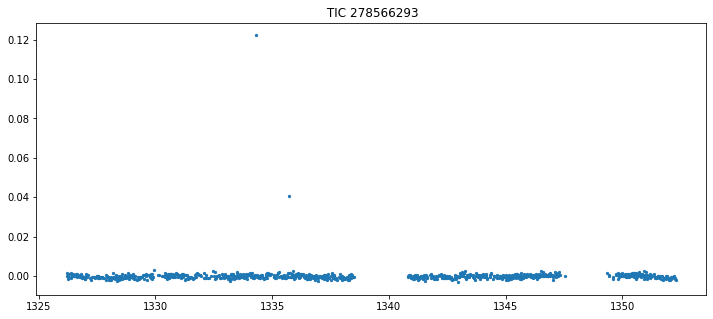

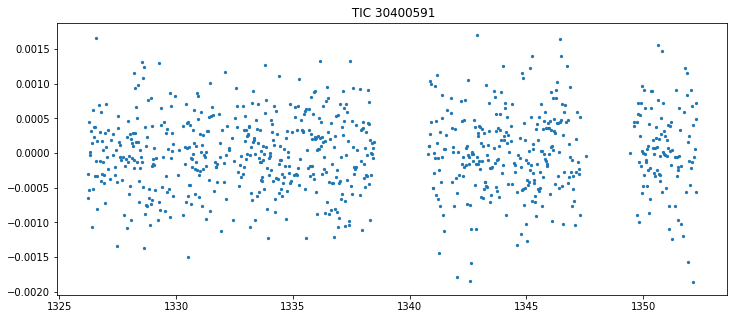

In [33]:
for i in data[(data.time >=1342) & (data.time <= 1345) & (data.duration <= 0.127)].path.head(): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

In [12]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1343) & (data['time'] <= 1345)].index,inplace=True)

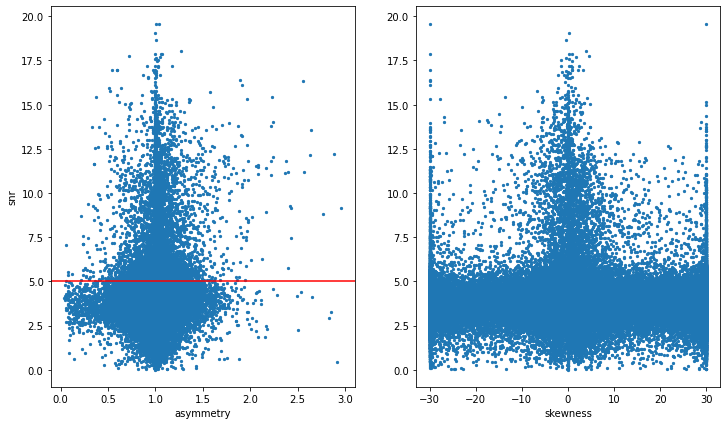

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

---

## SNR cut

In [14]:
data_new = data[(data.snr) <= -5].reset_index(drop=True)
data_new['abs_snr'] = abs(data_new.snr)

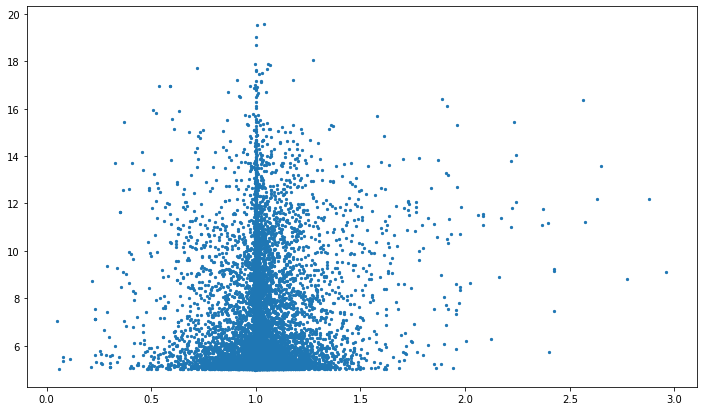

In [15]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

In [16]:
# for i in data_new.loc[abs(data_new.asym_score >= 1) & abs(data_new.asym_score <= 1.2)].path.head(): #4 x 4 grid for illustration purposes    
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

---
## Other property cuts

### Import EB catalogue

In [17]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [18]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_snr
0,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,142019570,-5.46920,-5.04308,1336.96968,1.00083,0.00024,0.50737,-1.84792,7.293400e+00,...,75.21844,75.12872,1.50437,1.50257,0.00034,0.00034,0.00025,0.00025,maybeTransit,5.04308
1,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,53850255,-7.81215,-5.01207,1327.53730,1.01255,0.00130,0.41756,5.20153,4.783290e+00,...,75.38677,69.48697,1.34619,1.24084,0.00103,0.00102,0.00085,0.00078,maybeTransit,5.01207
2,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,212261787,-9.90981,-7.08553,1338.30833,0.64135,0.00000,1.43745,14.15204,1.183332e+05,...,261.89703,420.52688,13.09485,21.02634,0.00174,0.00217,0.00135,0.00184,maybeTransit,7.08553
3,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,212352647,-11.06290,-6.03266,1343.97487,1.04097,0.00092,0.49030,29.97862,3.946881e+01,...,239.16334,230.80849,1.51369,1.46081,0.00063,0.00061,0.00044,0.00042,maybeTransit,6.03266
4,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,53752999,-10.36827,-6.07333,1351.07916,1.01372,0.00056,0.36426,3.44894,2.842520e+00,...,169.71680,160.78451,1.84475,1.74766,0.00051,0.00051,0.00040,0.00039,maybeTransit,6.07333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9334,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,260131774,-7.91752,-5.44658,1331.26003,1.08545,0.00073,0.17471,-16.56311,3.662778e+01,...,62.11974,55.04658,0.63387,0.56170,0.00115,0.00111,0.00083,0.00082,maybeTransit,5.44658
9335,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,159806897,-9.79916,-8.26562,1342.82891,1.16704,0.00095,0.06260,2.65454,1.716160e+00,...,21.01885,18.62654,1.05094,0.93133,0.00137,0.00126,0.00102,0.00088,maybeTransit,8.26562
9336,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,139127753,-5.99945,-5.02634,1326.66132,1.00000,0.00007,0.00954,18.54725,1.669790e+00,...,65.99046,65.99046,3.29952,3.29952,0.00255,0.00255,0.00203,0.00203,maybeTransit,5.02634
9337,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...,212351611,-9.57345,-6.52591,1330.49596,1.00000,0.00106,0.00989,-4.02749,1.466494e+09,...,995.71604,995.71613,49.78580,49.78581,0.01280,0.01280,0.00794,0.00794,maybeTransit,6.52591


In [19]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [20]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [21]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

Percentage of candidates which are known:

In [22]:
len(ebs_found) / len(data_new)

0.09722668379912196

In [23]:
len(tois_found) / len(data_new)

0.007281293500374772

In [24]:
len(ebs_found + tois_found) / len(data_new)

0.10011778563015312

### Duration vs depth

In [25]:
frac_dur = data_new.duration[(data_new.is_eb == True)]
frac_depth = data_new.depth[(data_new.is_eb == True)]

In [26]:
len(frac_dur)/len(data_new.duration)

0.09722668379912196

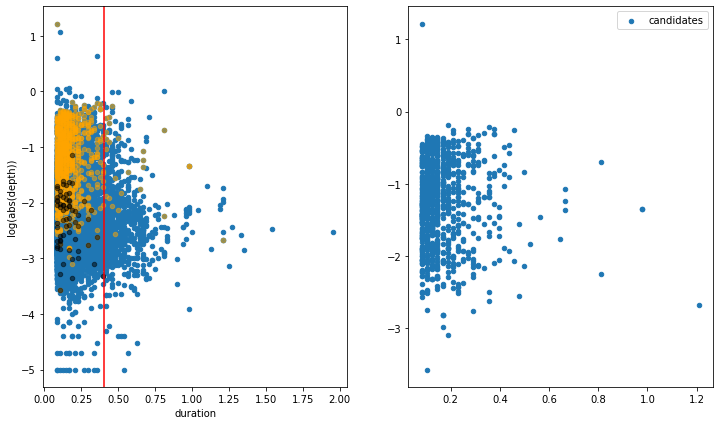

In [27]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates')
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs',alpha=0.5)
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois',alpha=0.5)

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

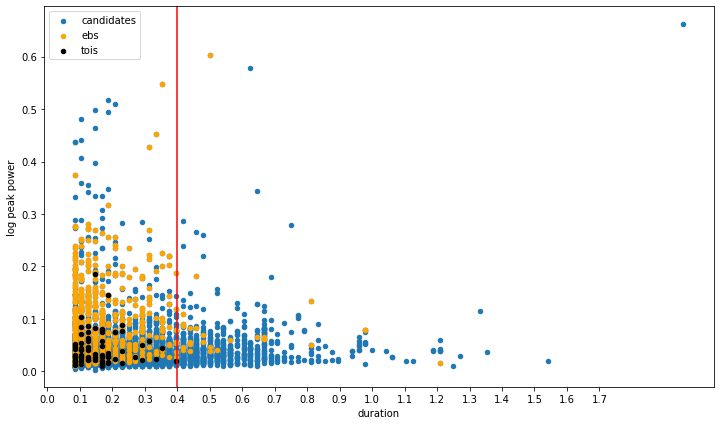

In [28]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

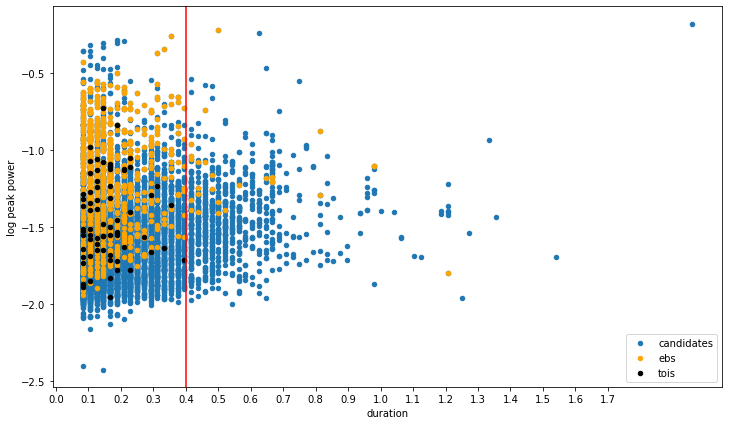

In [29]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [30]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

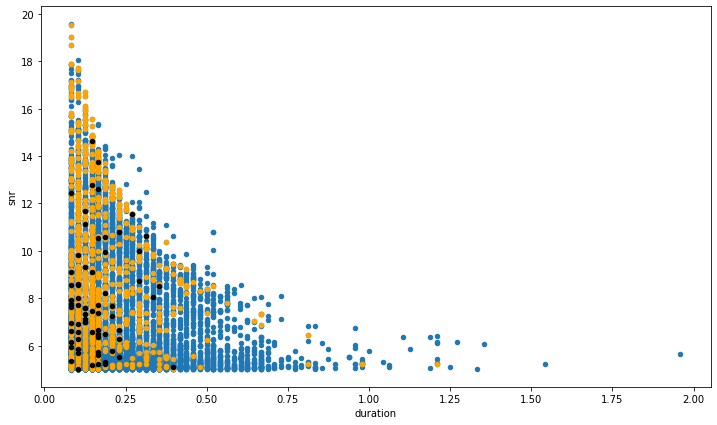

In [31]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

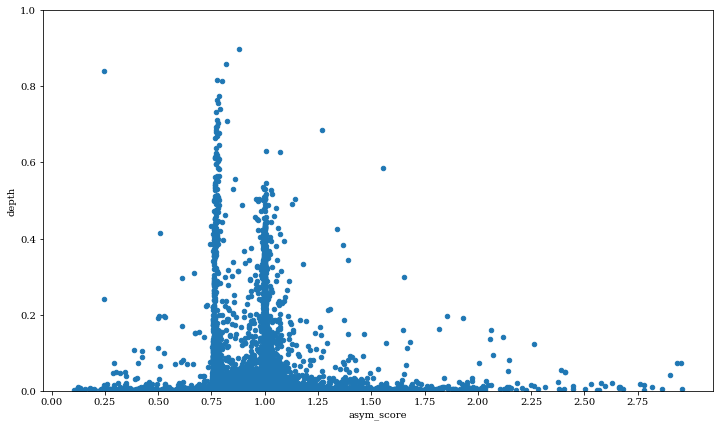

In [ ]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [30]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

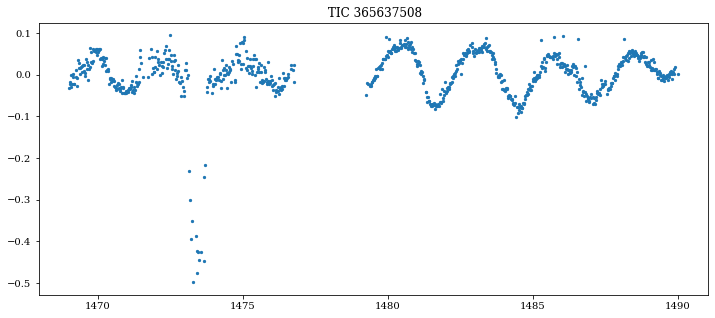

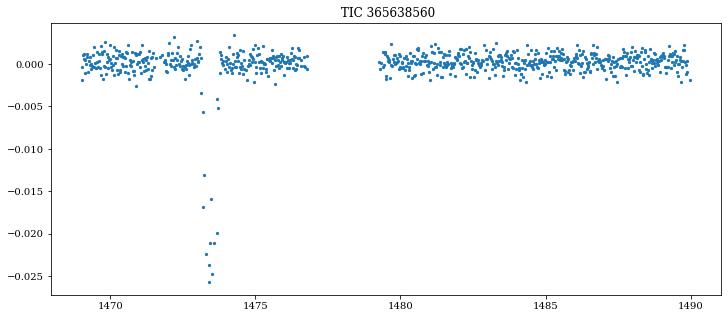

In [31]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

759


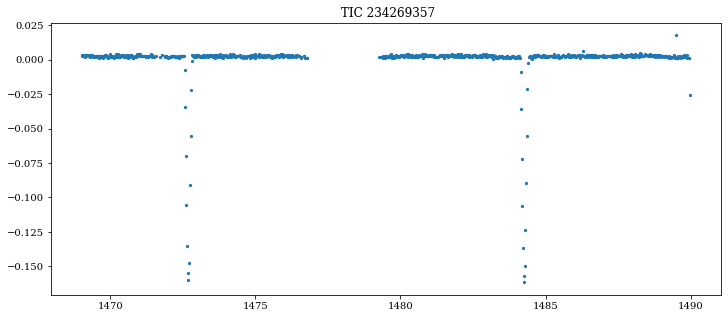

759


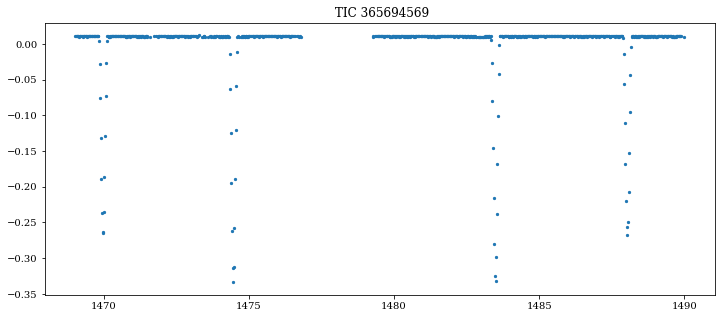

In [32]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [33]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [34]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
21,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689578,-9.93499,-6.53815,1480.97420,0.99246,0.00124,0.37095,4.61365,6.52792,...,1031.33758,6.47775,6.52745,0.00197,0.00198,0.00124,0.00126,maybeTransit,False,False
24,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689952,-9.53722,-5.49828,1480.99504,1.02597,0.00121,0.33495,-30.00000,130.49315,...,693.74974,4.04766,3.94176,0.00182,0.00179,0.00113,0.00113,maybeTransit,False,False
28,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365746782,-19.35356,-7.31018,1473.41228,0.95881,0.00372,0.31883,6.52423,2.95372,...,923.93038,7.20287,5.84766,0.00213,0.00218,0.00106,0.00109,maybeTransit,False,False
31,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365747781,-9.05362,-5.25317,1473.39141,0.91312,0.00072,0.17278,-0.32598,9.07848,...,126.97013,0.74804,0.69764,0.00051,0.00054,0.00041,0.00042,maybeTransit,False,False
42,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,229172474,-17.04166,-6.50876,1473.41228,0.89494,0.00165,0.16819,0.00134,434604.85926,...,968.87502,6.74347,6.13212,0.00113,0.00120,0.00073,0.00076,maybeTransit,False,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [35]:
from matplotlib.colors import ListedColormap

In [36]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

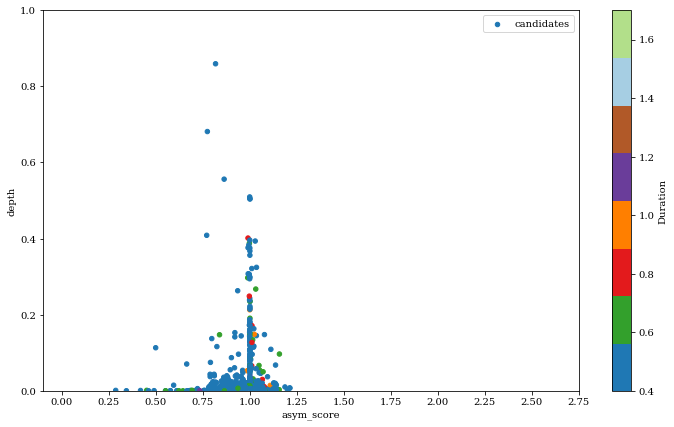

In [37]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlim([-0.1,2])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20a856a050>]],
      dtype=object)

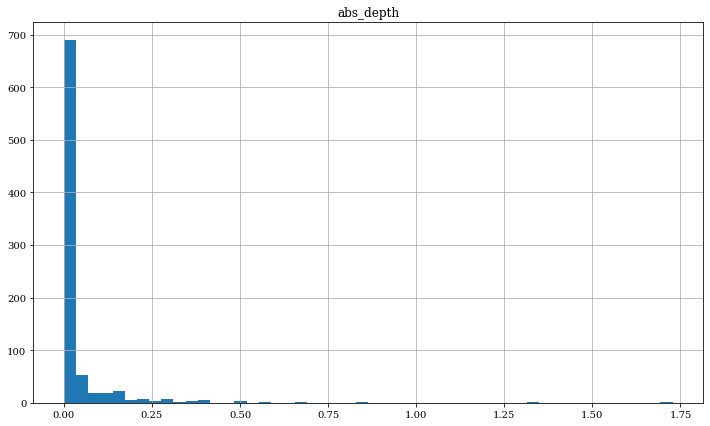

In [38]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20b385df10>]],
      dtype=object)

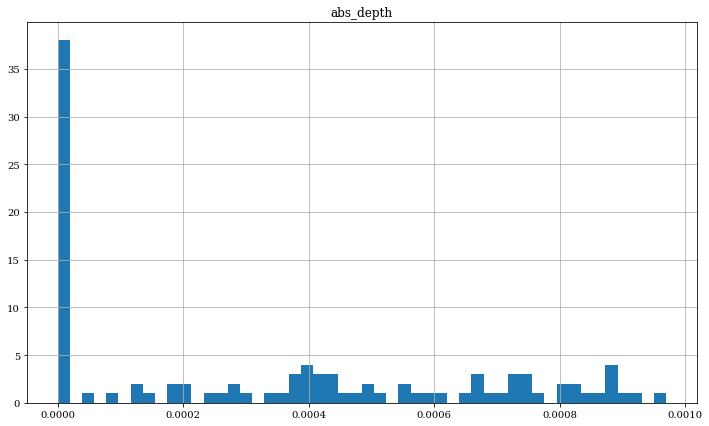

In [39]:
data_new[data_new.abs_depth <= 0.001].hist('abs_depth',bins=50)

In [40]:
data_new[data_new.abs_depth <= 0.001]

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi,abs_depth
79,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,234116467,-16.09377,-6.55132,1486.47466,0.57567,0.00000,1.35509,26.50185,0.00000,...,83.53593,142.80709,0.00081,0.00107,0.00061,0.00084,maybeTransit,False,False,0.00000
161,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,232226413,-9.81396,-5.11938,1474.37056,0.76251,0.00000,0.00002,-29.99999,0.00000,...,1.84251,2.42135,0.00095,0.00109,0.00075,0.00084,maybeTransit,False,False,0.00030
297,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,237390567,-5.94931,-5.24189,1486.03464,0.99998,0.00014,0.12741,0.00853,43224.84705,...,1.40148,1.40146,0.00041,0.00041,0.00032,0.00032,maybeTransit,False,False,0.00043
339,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,282267615,-7.42700,-5.27489,1474.43305,0.93660,0.00000,7.43749,-29.99648,0.00000,...,3.23469,3.45834,0.00076,0.00078,0.00064,0.00066,maybeTransit,False,False,0.00000
343,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,50898809,-10.42099,-5.23923,1485.55762,1.00078,0.00027,0.28108,1.06031,1.71074,...,1.57064,1.56942,0.00018,0.00018,0.00014,0.00014,maybeTransit,False,False,0.00048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13389,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52277263,-6.32649,-5.43530,1480.43068,0.89347,0.00000,0.00000,30.00000,0.00000,...,0.42308,0.47465,0.00129,0.00137,0.00097,0.00103,maybeTransit,False,False,0.00000
13420,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,52920741,-4.35497,-5.16122,1474.40974,1.00274,0.00025,0.80227,23.56846,228.80986,...,17.53001,17.47370,0.00114,0.00114,0.00092,0.00092,maybeTransit,False,False,0.00025
13561,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_12...,52290341,-7.87437,-5.77035,1473.45413,0.86396,0.00000,6.14151,28.69808,0.00000,...,4.46778,5.49623,0.00063,0.00068,0.00049,0.00049,maybeTransit,False,False,0.00000
13746,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_9_...,33989737,-9.88956,-5.83580,1481.24459,0.82514,0.00000,8.18748,-29.99975,0.00000,...,2.11782,2.57756,0.00035,0.00039,0.00029,0.00032,maybeTransit,False,False,0.00000


In [41]:
for i in data_new[data_new.asym_score <= 0.01].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [42]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

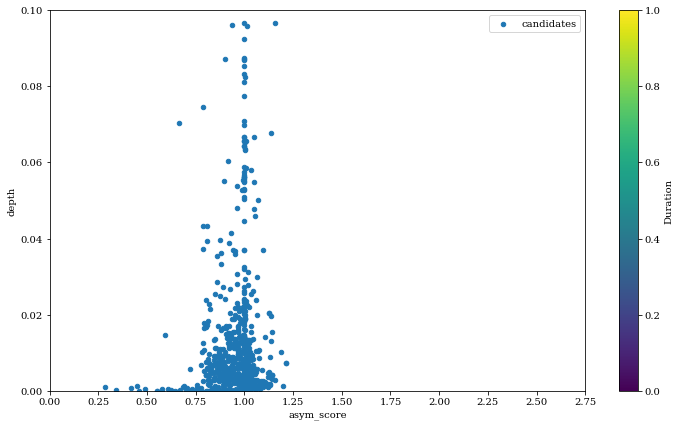

In [43]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

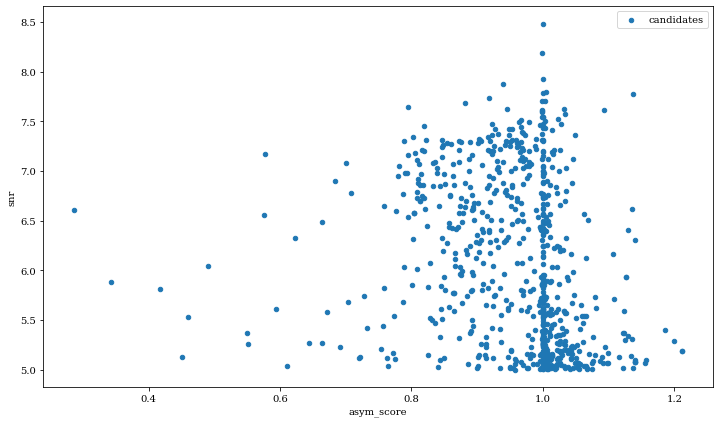

In [44]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

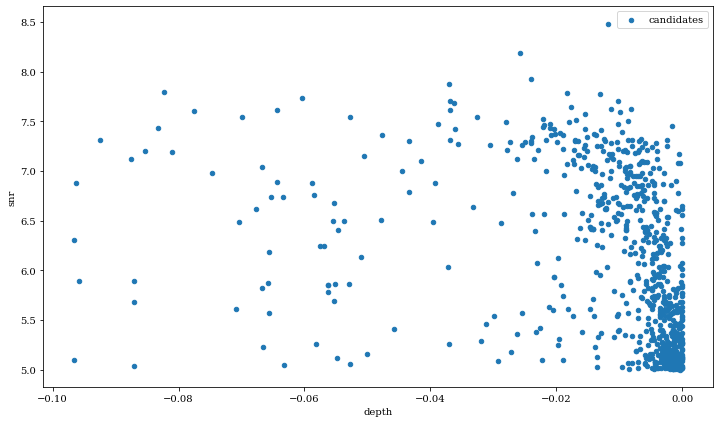

In [45]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [46]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [47]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)